In [2]:
import pandas as pd
import ast

In [3]:
tmp_df = pd.read_csv("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/dartfish/proximity_analysis_Astro_200um.csv", sep=",")

In [5]:
tmp_df["CellTypeCounts"] = tmp_df["CellTypeCounts"].apply(ast.literal_eval)

In [12]:
tmp_df

,CellType,Sampled_x,Sampled_y,Region,CellTypeCounts
0,Astro,3887.000000,28793.000000,V1C,"{'Astro': 17, 'L6 CT': 11, 'L6 IT': 8, 'Micro/..."
1,Astro,12736.000000,-7484.000000,S1C,"{'Oligo': 50, 'SST': 6, 'L6 IT': 5, 'L6 IT Car..."
2,Astro,5627.000000,-5643.000000,A1C,"{'Oligo': 37, 'Astro': 9, 'Micro/PVM': 2, 'L6 ..."
3,Astro,1048.000000,26643.000000,V1C,"{'L6 CT': 16, 'L6 IT Car3': 14, 'L6 IT': 12, '..."
4,Astro,15392.000000,-11780.000000,MTG,"{'L2/3 IT': 16, 'Oligo': 5, 'OPC': 4, 'Micro/P..."
...,...,...,...,...,...
95,Astro,522.000000,29504.000000,V1C,"{'Astro': 18, 'L6 CT': 15, 'L6 IT': 13, 'L5 IT..."
96,Astro,3780.544414,-24213.121642,ACC,"{'Astro': 11, 'Micro/PVM': 11, 'L5 IT': 6, 'L4..."
97,Astro,338.000000,28955.000000,V1C,"{'L6 CT': 16, 'L6 IT': 13, 'Astro': 11, 'SST':..."
98,Astro,6373.000000,-13510.000000,A1C,"{'Oligo': 33, 'Astro': 9, 'L5 IT': 7, 'L6 IT C..."


In [11]:
from collections import Counter

# Function to merge and sum dictionaries
def sum_dicts(dicts):
    result = Counter()  # Counter is great for summing dictionaries
    for d in dicts:
        result.update(d)  # Adds the counts for the same keys
    return dict(result)  # Convert back to a regular dictionary

In [56]:
result = tmp_df.groupby("Region")["CellTypeCounts"].apply(sum_dicts).reset_index()

In [16]:
result_df = result.fillna(0)

In [17]:
import seaborn as sns

In [31]:
result_df["percent"] = result_df.groupby("Region")["CellTypeCounts"].transform(lambda x: x / x.sum())

In [36]:
subclass_order = [
    "L2/3 IT", "L4 IT", "L5 IT", "L6 IT", "L6 IT Car3", "L6 CT", "L5 ET", "L5/6 NP", "L6B",
    "PVALB", "LAMP5", "LAMP5 LHX6", "PAX6", "SNCG", "VIP", "SST", "SST CHODL", "Chandelier",
    "Oligo", "Astro", "Micro/PVM", "OPC", "Endo", "VLMC"
]

In [37]:
result_df["level_1"] = pd.Categorical(result_df["level_1"], categories=subclass_order)

In [38]:
result_df

,Region,level_1,CellTypeCounts,percent
0,A1C,Oligo,330.0,0.453920
1,A1C,Astro,106.0,0.145805
2,A1C,Micro/PVM,41.0,0.056396
3,A1C,L6 CT,22.0,0.030261
4,A1C,L2/3 IT,58.0,0.079780
...,...,...,...,...
211,V1C,LAMP5 LHX6,26.0,0.010454
212,V1C,L4 IT,188.0,0.075593
213,V1C,LAMP5,29.0,0.011661
214,V1C,SST CHODL,0.0,0.000000


<AxesSubplot: xlabel='Region', ylabel='Count'>

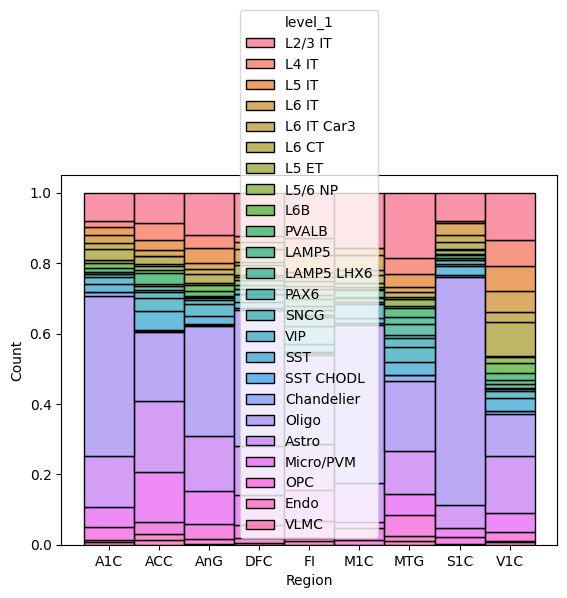

In [39]:
sns.histplot(result_df, x="Region", hue="level_1", weights="percent", multiple="stack",)

In [51]:
count = 0
for obj_tmp in tmp_df[tmp_df["Region"] == "V1C"]["CellTypeCounts"]:
    if "SST CHODL" in obj_tmp:
        count += obj_tmp["SST CHODL"]

In [52]:
count

0

In [58]:
result_df.columns = ["region", "subclass", "counts", "percent"]

In [60]:
result_df.to_csv("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/dartfish/proximity_analysis_Astro_200um_cleaned.csv", index=False)